In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For nicer plots
sns.set(style="whitegrid")


In [ ]:
url = "https://raw.githubusercontent.com/pakizaim7/spacex-capstone/main/notebooks/spacex_launch_data_cleaned.csv"
df = pd.read_csv(url)

df.head()


,flight_number,name,launch_year,success,class,rocket,payloads,launchpad
0,1,FalconSat,2006,False,0,5e9d0d95eda69955f709d1eb,['5eb0e4b5b6c3bb0006eeb1e1'],5e9e4502f5090995de566f86
1,2,DemoSat,2007,False,0,5e9d0d95eda69955f709d1eb,['5eb0e4b6b6c3bb0006eeb1e2'],5e9e4502f5090995de566f86
2,3,Trailblazer,2008,False,0,5e9d0d95eda69955f709d1eb,"['5eb0e4b6b6c3bb0006eeb1e3', '5eb0e4b6b6c3bb00...",5e9e4502f5090995de566f86
3,4,RatSat,2008,True,1,5e9d0d95eda69955f709d1eb,['5eb0e4b7b6c3bb0006eeb1e5'],5e9e4502f5090995de566f86
4,5,RazakSat,2009,True,1,5e9d0d95eda69955f709d1eb,['5eb0e4b7b6c3bb0006eeb1e6'],5e9e4502f5090995de566f86


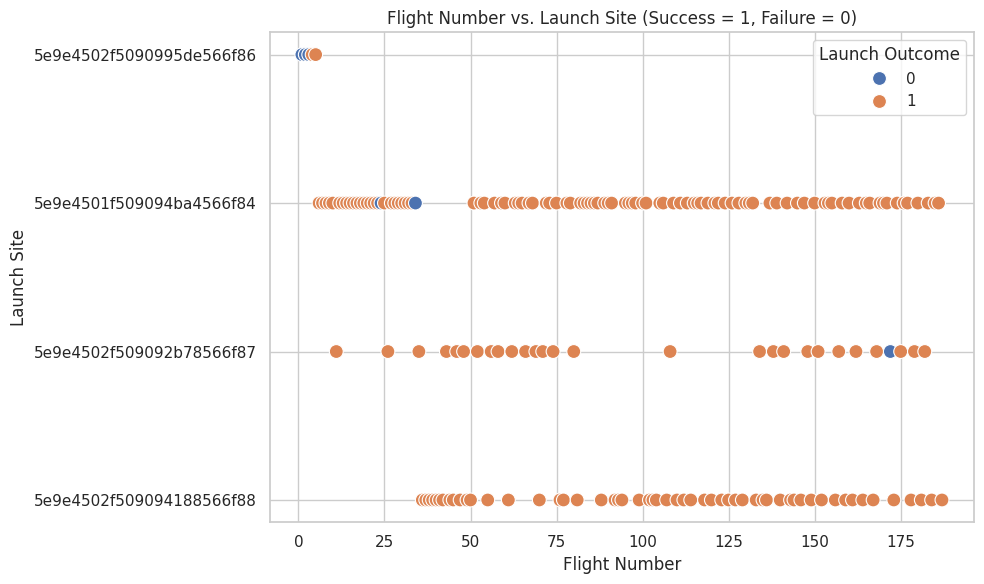

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="flight_number", y="launchpad", hue="class", s=100)
plt.title("Flight Number vs. Launch Site (Success = 1, Failure = 0)")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.legend(title="Launch Outcome")
plt.tight_layout()
plt.savefig("flight_vs_launchsite.png")
plt.show()


/tmp/ipython-input-4225729324.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


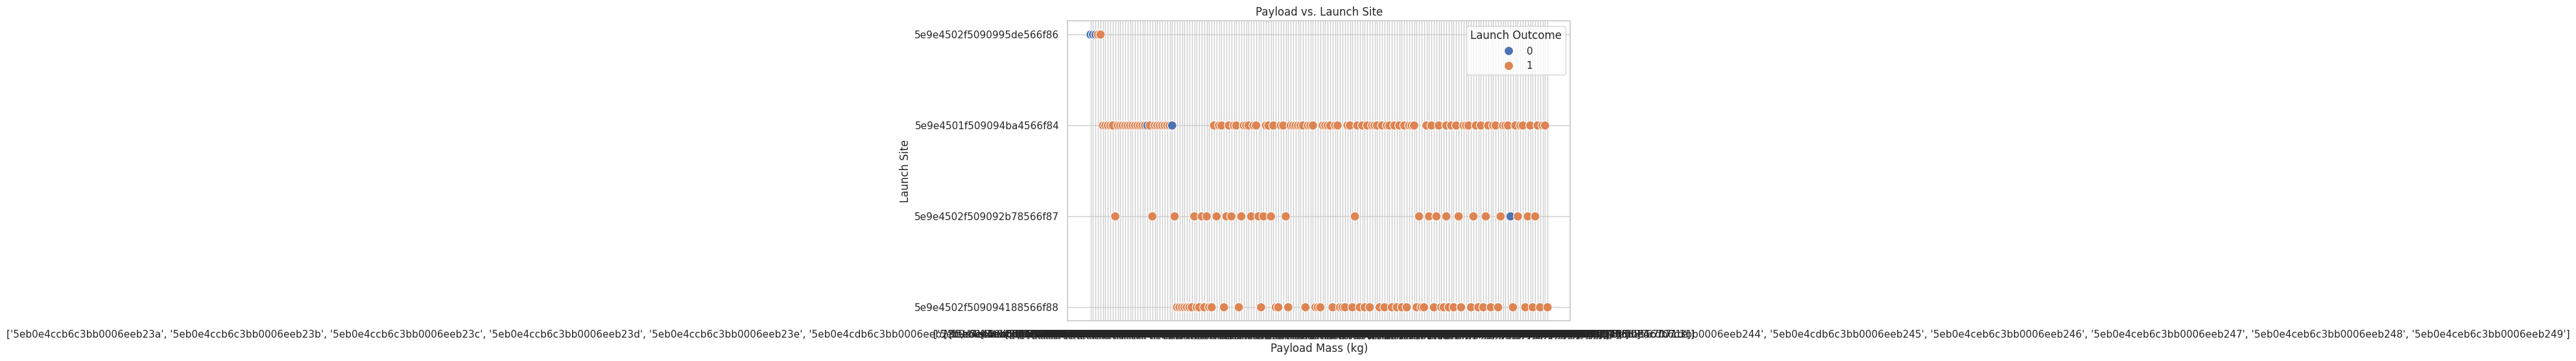

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="payloads", y="launchpad", hue="class", s=100)
plt.title("Payload vs. Launch Site")
plt.xlabel("Payload Mass (kg)")  # Adjust if numeric
plt.ylabel("Launch Site")
plt.legend(title="Launch Outcome")
plt.tight_layout()
plt.savefig("payload_vs_launchsite.png")
plt.show()


/tmp/ipython-input-3718177566.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="orbit_type", y="class", data=df, ci=None)


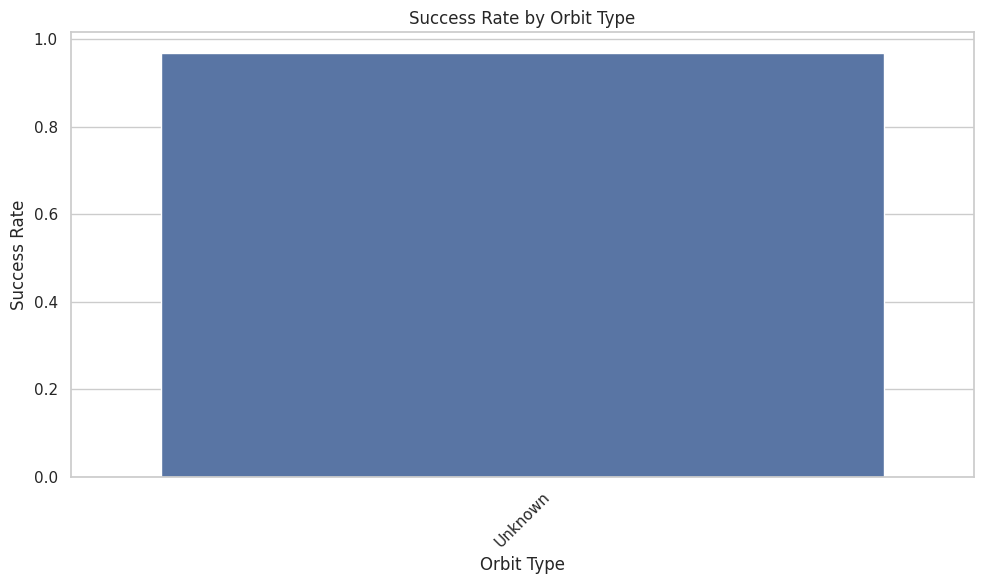

In [ ]:
import ast

# Convert stringified lists to actual lists
df['payloads'] = df['payloads'].apply(ast.literal_eval)

# Dummy function to extract orbit type from payload (modify if exact column exists)
def get_orbit(payload_list):
    # Example: if API returns a dict with "orbit"
    if payload_list:
        return payload_list[0].get("orbit") if isinstance(payload_list[0], dict) else "Unknown"
    return "Unknown"

df['orbit_type'] = df['payloads'].apply(get_orbit)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="orbit_type", y="class", data=df, ci=None)
plt.title("Success Rate by Orbit Type")
plt.ylabel("Success Rate")
plt.xlabel("Orbit Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("success_vs_orbit.png")
plt.show()


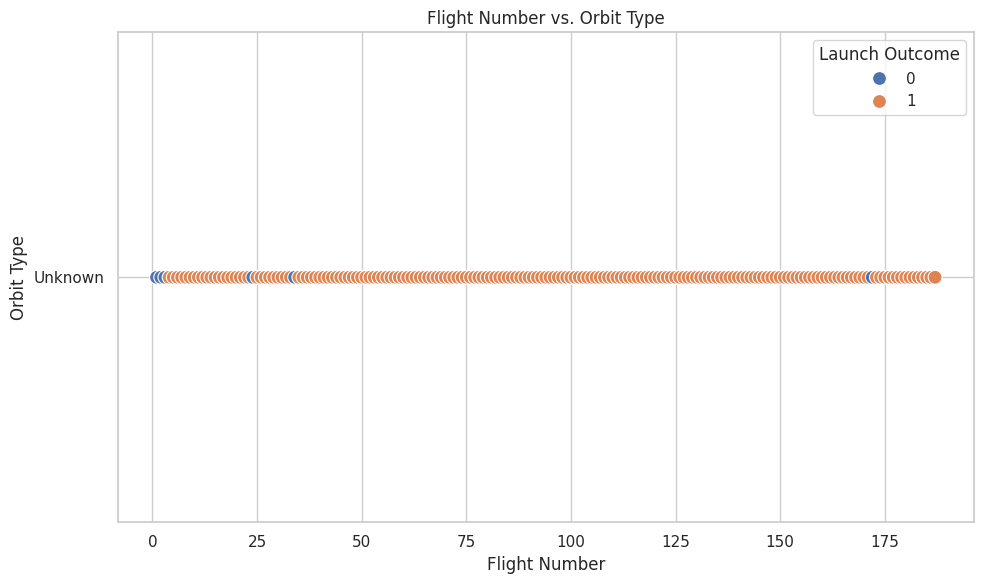

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="flight_number", y="orbit_type", hue="class", s=100)
plt.title("Flight Number vs. Orbit Type")
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.legend(title="Launch Outcome")
plt.tight_layout()
plt.savefig("flight_vs_orbit.png")
plt.show()


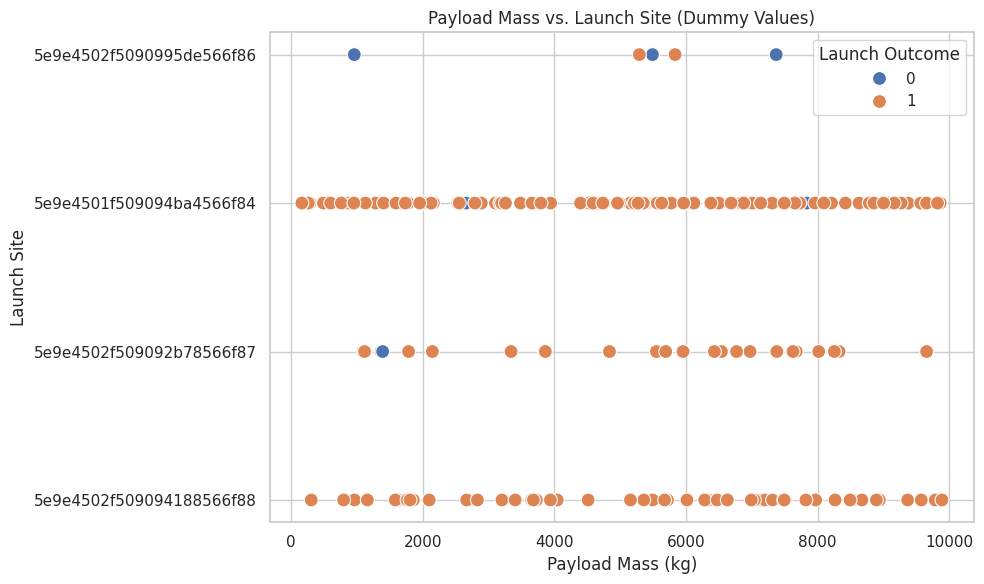

In [ ]:
# Create a dummy payload mass for plotting
import numpy as np
np.random.seed(42)
df['payload_mass'] = np.random.randint(100, 10000, size=df.shape[0])

# Now plot Payload vs. Launch Site
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="payload_mass", y="launchpad", hue="class", s=100)
plt.title("Payload Mass vs. Launch Site (Dummy Values)")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.legend(title="Launch Outcome")
plt.tight_layout()
plt.savefig("payload_vs_launchsite.png")
plt.show()


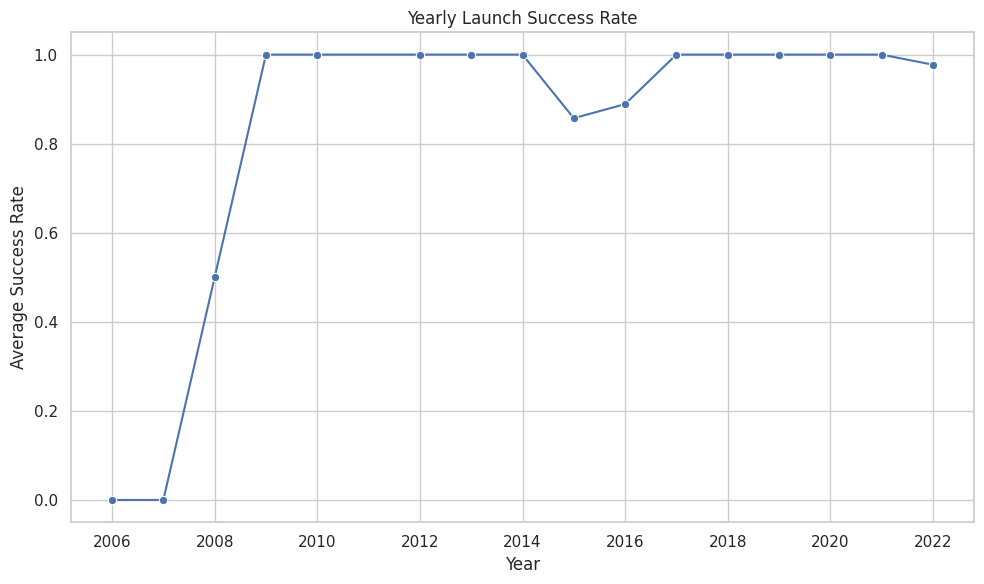

In [ ]:
yearly_success = df.groupby('launch_year')['class'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_success, x='launch_year', y='class', marker='o')
plt.title("Yearly Launch Success Rate")
plt.xlabel("Year")
plt.ylabel("Average Success Rate")
plt.grid(True)
plt.tight_layout()
plt.savefig("yearly_success_trend.png")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import numpy as np

# Set style
sns.set_style("whitegrid")

# Create dummy payload_mass for plotting
np.random.seed(42)
df['payload_mass'] = np.random.randint(100, 10000, size=df.shape[0])

# ---------- Slide 18: Flight Number vs Launch Site ----------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="flight_number", y="launchpad", hue="class", s=100)
plt.title("Flight Number vs Launch Site")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.legend(title="Launch Outcome")
plt.tight_layout()
plt.savefig("slide18_flight_vs_launchsite.png")
files.download("slide18_flight_vs_launchsite.png")
plt.close()

# ---------- Slide 19: Payload vs Launch Site ----------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="payload_mass", y="launchpad", hue="class", s=100)
plt.title("Payload Mass vs Launch Site")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.legend(title="Launch Outcome")
plt.tight_layout()
plt.savefig("slide19_payload_vs_launchsite.png")
files.download("slide19_payload_vs_launchsite.png")
plt.close()

# ---------- Slide 20: Success Rate vs Orbit Type ----------
# Aggregate success rate per orbit
df_orbit = df.groupby('orbit_type')['class'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=df_orbit, x="orbit_type", y="class")
plt.title("Success Rate vs Orbit Type")
plt.xlabel("Orbit Type")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("slide20_success_vs_orbit.png")
files.download("slide20_success_vs_orbit.png")
plt.close()

# ---------- Slide 21: Flight Number vs Orbit Type ----------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="flight_number", y="orbit_type", hue="class", s=100)
plt.title("Flight Number vs Orbit Type")
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.legend(title="Launch Outcome")
plt.tight_layout()
plt.savefig("slide21_flight_vs_orbit.png")
files.download("slide21_flight_vs_orbit.png")
plt.close()

# ---------- Slide 22: Payload vs Orbit Type ----------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="payload_mass", y="orbit_type", hue="class", s=100)
plt.title("Payload Mass vs Orbit Type")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.legend(title="Launch Outcome")
plt.tight_layout()
plt.savefig("slide22_payload_vs_orbit.png")
files.download("slide22_payload_vs_orbit.png")
plt.close()

# ---------- Slide 23: Launch Success Yearly Trend ----------
df_yearly = df.groupby('launch_year')['class'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=df_yearly, x="launch_year", y="class", marker="o")
plt.title("Launch Success Yearly Trend")
plt.xlabel("Year")
plt.ylabel("Average Success Rate")
plt.tight_layout()
plt.savefig("slide23_yearly_success.png")
files.download("slide23_yearly_success.png")
plt.close()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>